In [1]:
import sys
from packaging import version

X = [89, 111, 117, 39, 114, 101, 32, 97, 108, 108, 32, 115, 101, 116, 33, 32, 32, 83, 101, 101, 32, 121, 111, 117, 32, 105, 110, 32, 65, 117, 103, 117, 115, 116, 33]
Y = [73, 116, 32, 108, 111, 111, 107, 115, 32, 108, 105, 107, 101, 32, 121, 111, 117, 114, 32, 101, 110, 118, 105, 114, 111, 110, 109, 101, 110, 116, 32, 105, 115, 110, 39, 116, 32, 115, 101, 116, 32, 117, 112, 32, 99, 111, 114, 114, 101, 99, 116, 108, 121, 46, 10, 73, 102, 32, 121, 111, 117, 39, 114, 101, 32, 115, 101, 101, 105, 110, 103, 32, 116, 104, 105, 115, 32, 109, 101, 115, 115, 97, 103, 101, 44, 32, 121, 111, 117, 32, 112, 114, 111, 98, 97, 98, 108, 121, 32, 104, 97, 118, 101, 32, 97, 110, 32, 111, 108, 100, 101, 114, 32, 118, 101, 114, 115, 105, 111, 110, 32, 111, 102, 32, 80, 121, 116, 104, 111, 110, 32, 105, 110, 115, 116, 97, 108, 108, 101, 100, 32, 111, 114, 32, 99, 111, 110, 102, 105, 103, 117, 114, 101, 100, 46, 10, 10, 80, 108, 101, 97, 115, 101, 32, 105, 110, 115, 116, 97, 108, 108, 32, 116, 104, 101, 32, 108, 97, 116, 101, 115, 116, 32, 65, 110, 97, 99, 111, 110, 100, 97, 32, 102, 111, 114, 32, 80, 121, 116, 104, 111, 110, 32, 51, 58, 32, 32, 104, 116, 116, 112, 115, 58, 47, 47, 119, 119, 119, 46, 97, 110, 97, 99, 111, 110, 100, 97, 46, 99, 111, 109, 47, 100, 105, 115, 116, 114, 105, 98, 117, 116, 105, 111, 110, 47]

if version.parse(sys.version.split()[0])>=version.parse('3.7.0'):
    print(''.join(map(chr,X)))
else:
    print(''.join(map(chr,Y)))

You're all set!  See you in August!


/var/folders/45/vxs3qxtn0ql1mmj2dm1w3zxw0000gp/T/ipykernel_3562/1634867785.py:5: RuntimeWarning: divide by zero encountered in power
  return y_min + (y_max - y_min) / (1 + (t/a)**b)


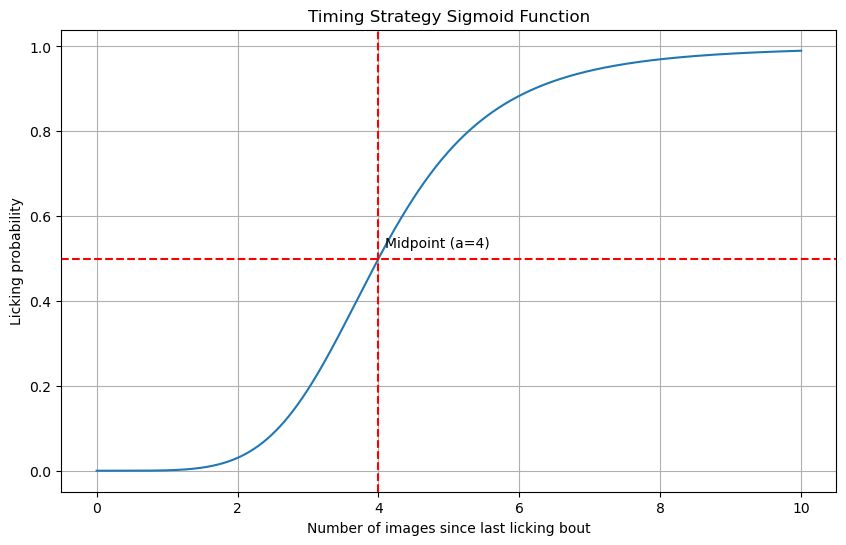

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t, y_min, y_max, a, b):
    return y_min + (y_max - y_min) / (1 + (t/a)**b)

# Parameters from the paper
y_min = 0
y_max = 1
a = 4
b = -5
# Generate t values
t = np.linspace(0, 10, 1000)

# Calculate y values
y = sigmoid(t, y_min, y_max, a, b)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Timing Strategy Sigmoid Function')
plt.xlabel('Number of images since last licking bout')
plt.ylabel('Licking probability')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=4, color='r', linestyle='--')
plt.text(4.1, 0.52, 'Midpoint (a=4)', verticalalignment='bottom')
plt.grid(True)
plt.show()

fig.savefig('plots/graphics/')

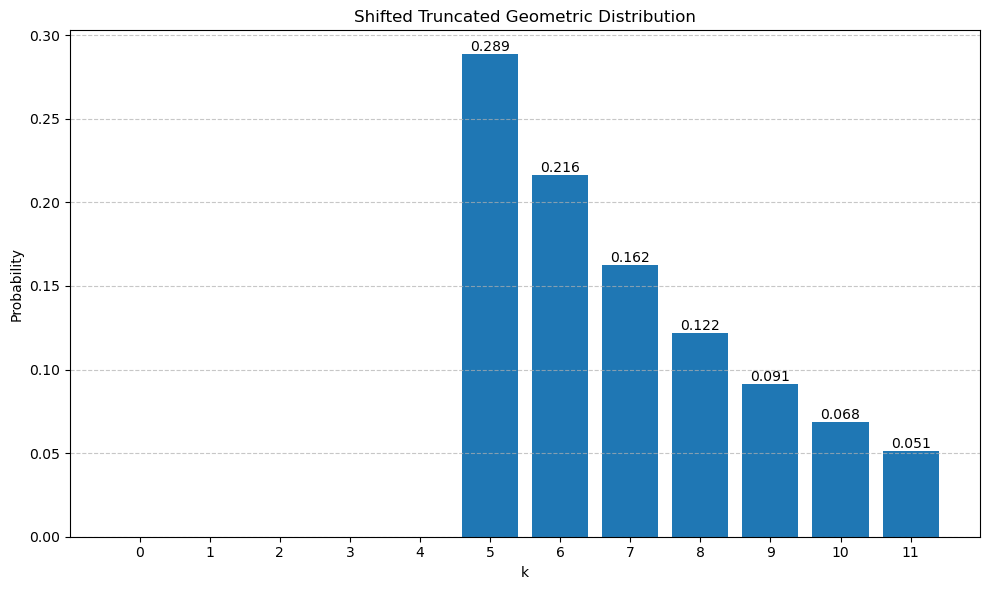

In [3]:
def truncated_geometric_prob(k, p, start=5, end=11):
    if k < start or k > end:
        return 0
    
    unnormalized = p * (1-p)**(k-start)
    normalization = sum(p * (1-p)**(i-start) for i in range(start, end+1))
    return unnormalized / normalization

# Guessed parameters of p, with info for start and end
p = 0.25
start = 5
end = 11

# Calculate probabilities
x = np.arange(0, 12)
probs = [truncated_geometric_prob(k, p, start, end) for k in x]

plt.figure(figsize=(10, 6))
plt.bar(x, probs)
plt.title('Shifted Truncated Geometric Distribution')
plt.xlabel('k')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, prob in enumerate(probs):
    if prob > 0:
        plt.text(i, prob, f'{prob:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [4]:
cumprob = np.cumsum(probs)